In [1]:
import pandas as pd
from IPython.display import display
from tqdm import tqdm
from collections import Counter
import ast
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sb

In [3]:
from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob
import scipy.stats as stats

In [4]:
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.manifold import TSNE

In [5]:
!pip install bokeh
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook
output_notebook()

You should consider upgrading via the 'c:\users\nethr\appdata\local\programs\python\python36\python.exe -m pip install --upgrade pip' command.


Loading BokehJS ...

In [6]:
datafile = 'abcnews-date-text.csv'

In [7]:
raw_data = pd.read_csv(datafile,parse_dates=[0],infer_datetime_format=True)

In [8]:
raw_data.head(3)

,publish_date,headline_text
0,2003-02-19,aba decides against community broadcasting lic...
1,2003-02-19,act fire witnesses must be aware of defamation
2,2003-02-19,a g calls for infrastructure protection summit


In [9]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1082168 entries, 0 to 1082167
Data columns (total 2 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   publish_date   1082168 non-null  datetime64[ns]
 1   headline_text  1082168 non-null  object        
dtypes: datetime64[ns](1), object(1)
memory usage: 16.5+ MB


In [10]:
raw_data.tail(3)

,publish_date,headline_text
1082165,2017-06-30,winter closes in on tasmania as snow ice falls
1082166,2017-06-30,womens world cup australia wins despite atapat...
1082167,2017-06-30,youtube stunt death foreshadowed by tweet


In [11]:
reindexed_data = raw_data['headline_text']
reindexed_data.index= raw_data['publish_date']

In [12]:
reindexed_data # Series

publish_date
2003-02-19    aba decides against community broadcasting lic...
2003-02-19       act fire witnesses must be aware of defamation
2003-02-19       a g calls for infrastructure protection summit
2003-02-19             air nz staff in aust strike for pay rise
2003-02-19        air nz strike to affect australian travellers
                                    ...                        
2017-06-30    when is it ok to compliment a womans smile a g...
2017-06-30                     white house defends trumps tweet
2017-06-30       winter closes in on tasmania as snow ice falls
2017-06-30    womens world cup australia wins despite atapat...
2017-06-30            youtube stunt death foreshadowed by tweet
Name: headline_text, Length: 1082168, dtype: object

In [13]:
raw_data.head()

,publish_date,headline_text
0,2003-02-19,aba decides against community broadcasting lic...
1,2003-02-19,act fire witnesses must be aware of defamation
2,2003-02-19,a g calls for infrastructure protection summit
3,2003-02-19,air nz staff in aust strike for pay rise
4,2003-02-19,air nz strike to affect australian travellers


* Now I need to find the list of topwords in the data used across all one million  headlines

* I have to Stopping words

In [14]:
def get_top_n_words(n_top_words,count_vectorizer,text_data):
    """ Now I  want to Return the data in  form of tuple of the n words in a simpler
    and their accompanying counts, give COUNTVECTORIZER """
    
    vectorized_headlines = count_vectorizer.fit_transform(text_data.values)
    #print("Headlines Vectorization", vectorized_headlines)
    vectorized_total = np.sum(vectorized_headlines, axis=0)
    word_indices = np.flip(np.argsort(vectorized_total)[0,:],1)
    word_values = np.flip(np.sort(vectorized_total)[0,:],1)
    
    
    word_vectors = np.zeros((n_top_words,vectorized_headlines.shape[1]))
    for i in range(n_top_words):
        word_vectors[i,word_indices[0,i]]=1
        
    words = [word[0].encode('ascii').decode('utf-8') for word in count_vectorizer.inverse_transform(word_vectors)]
    
    return(words,word_values[0,:n_top_words].tolist()[0])

In [15]:
count_vectorizer = CountVectorizer(stop_words='english')

In [16]:
words,word_values = get_top_n_words(n_top_words=15,
                                   count_vectorizer=count_vectorizer,
                                   text_data=reindexed_data)

In [17]:
words

['police',
 'new',
 'man',
 'says',
 'govt',
 'council',
 'court',
 'interview',
 'nsw',
 'plan',
 'australia',
 'water',
 'qld',
 'wa',
 'crash']

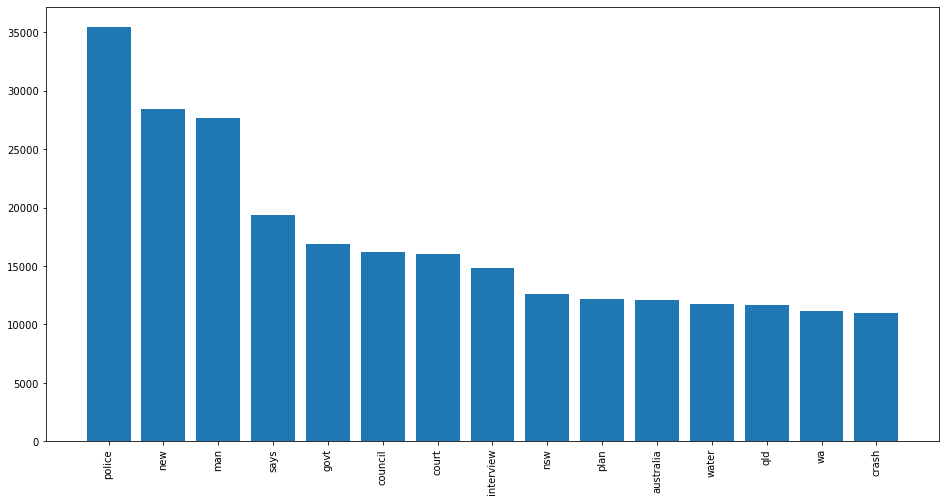

In [18]:
fig, ax = plt.subplots(figsize=(16,8))
ax.bar(range(len(words)), word_values);
ax.set_xticks(range(len(words)));
ax.set_xticklabels(words, rotation='vertical');

Next, we generate a histogram of headline word lengths, and use part of speech tagging to understand the types of words used across the corpus. This requires first converting all headline strings to TextBlobs and calling the pos_tags method on each, yielding a list of tagged words for each headline.

In [ ]:
tagged_headlines = [TextBlob(reindexed_data[i]).pos_tags for i in range(reindexed_data.shape[0])]

In [ ]:
tagged_headlines

In [ ]:
tagged_headlines_df = pd.DataFrame({'tags':tagged_headlines})


word_count = []
pos_counts = {}

for headlines in tagged_headlines_df['tags']:
    word_counts.append(len(headlines))
    for tag in headlines:
        if tag[1] in pos_counts:
            pos_counts[tag[1]] +=1
        else:
            pos_counts[tag[1]] =1
print("Total Number of Words":np.sum(word_counts))
print("Mean number ofwords per headline",np.mean(word_counts))


In [ ]:
y = stats.norm.pdf(np.linspace(0,14,50), np.mean(word_counts), np.std(word_counts))

In [ ]:
fig, ax = plt.subplots(figsize=(18,8))
ax.hist(word_counts, bins=range(1,14), density=True);
ax.plot(np.linspace(0,14,50), y, 'r--', linewidth=1);
ax.set_title('Headline word lengths');
ax.set_xticks(range(1,14));
ax.set_xlabel('Number of words');
plt.show()
    